<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module%205%20Lab-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Lab 2: Loss Functions**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


1. Regression

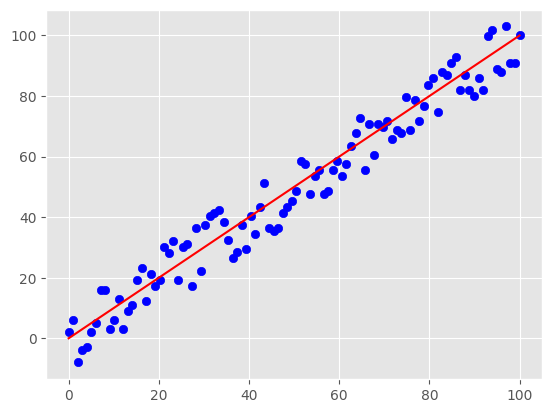

In [ ]:
np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

Mean Squared Error

In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


Mean Absolute Error

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


**2. Classification**

MLE and Cross-Entropy

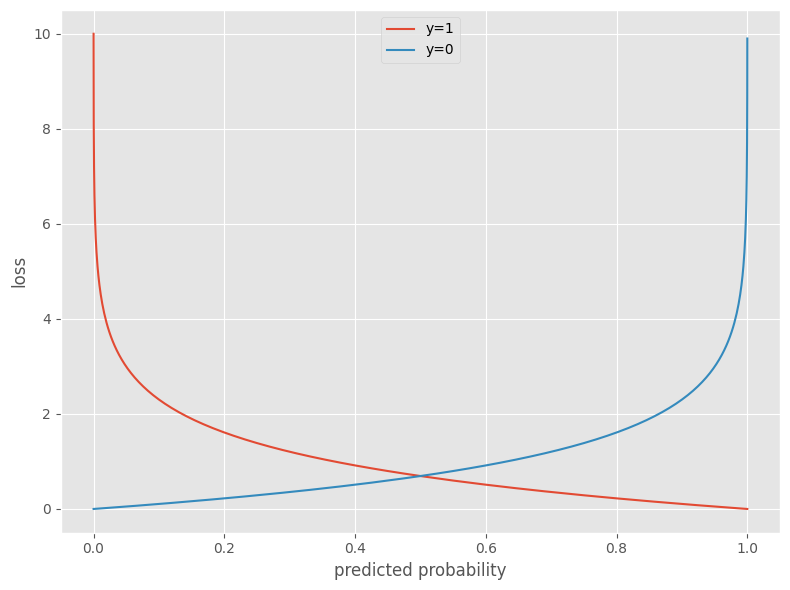

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##KNN-regression

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

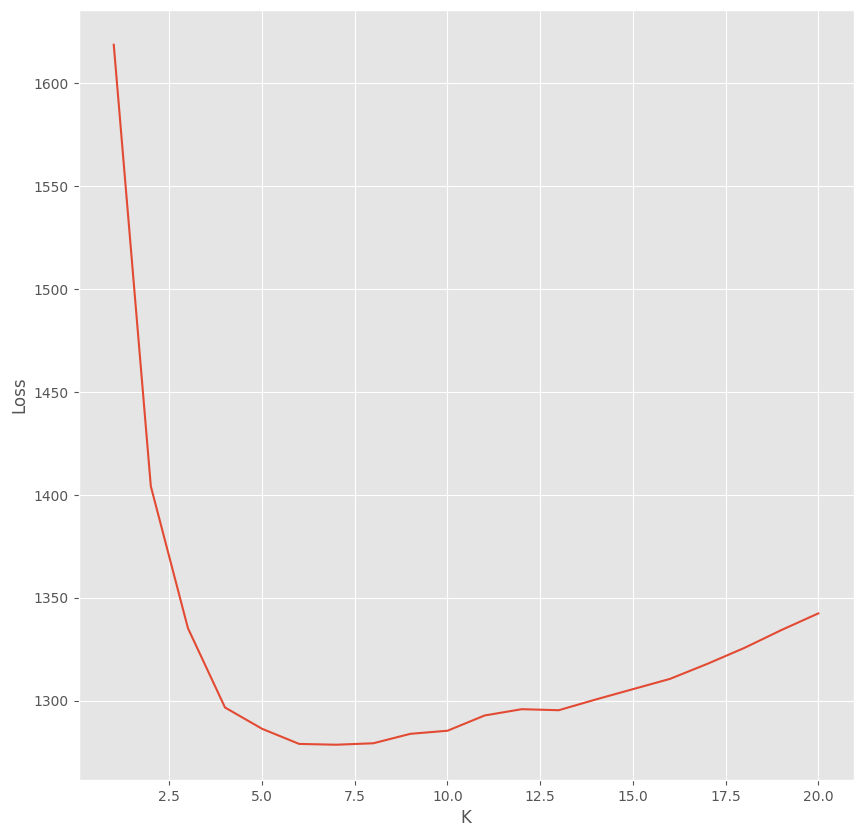

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

##Exercises

1.
Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate loss functions
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.99
Mean Absolute Error (MAE): 0.85


2. Explore other loss functions and try to understand when and why they are used.

**Huber Loss** : Less sensitive to outliers compared to MSE. Used in robust regression.

In [ ]:
def huber_loss(y_true, y_pred, delta=1.0):
      error = y_true - y_pred
      abs_error = np.abs(error)
      return np.where(abs_error <= delta, 0.5 * error**2, delta * (abs_error - 0.5 * delta))

**Log-Cosh Loss** : Smoother than Huber loss. Used when a differentiable loss function is desired.

In [ ]:
def log_cosh_loss(y_true, y_pred):
      error = y_true - y_pred
      return np.log(np.cosh(error))

**Quantile Loss** :  Used to estimate quantiles of the target variable. Useful for applications like predicting confidence intervals.

In [ ]:
def quantile_loss(y_true, y_pred, quantile=0.5):
      error = y_true - y_pred
      return np.maximum(quantile * error, (quantile - 1) * error)

3. Try out KNN-regression on other datasets see which values of K give the best results.

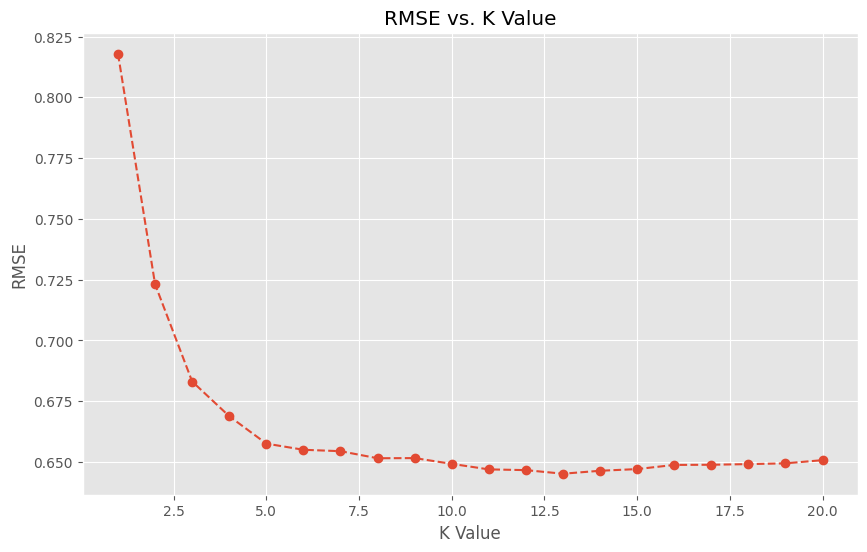

Optimal K value: 13


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Removed import of load_boston
#from sklearn.datasets import load_boston

# Load the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MEDV'] = housing.target # Changed to 'MEDV' to match the rest of the code

# Separate features (X) and target variable (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find optimal K
rmse_val = []
for k in range(1, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred, squared=False)
    rmse_val.append(error)

# Plot RMSE values against K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_val, marker='o', linestyle='dashed')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.title('RMSE vs. K Value')
plt.show()

# Find the optimal K with the lowest RMSE
optimal_k = range(1, 21)[rmse_val.index(min(rmse_val))]
print(f"Optimal K value: {optimal_k}")

4.Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.


K = 1: RMSE = 0.8179316411046703


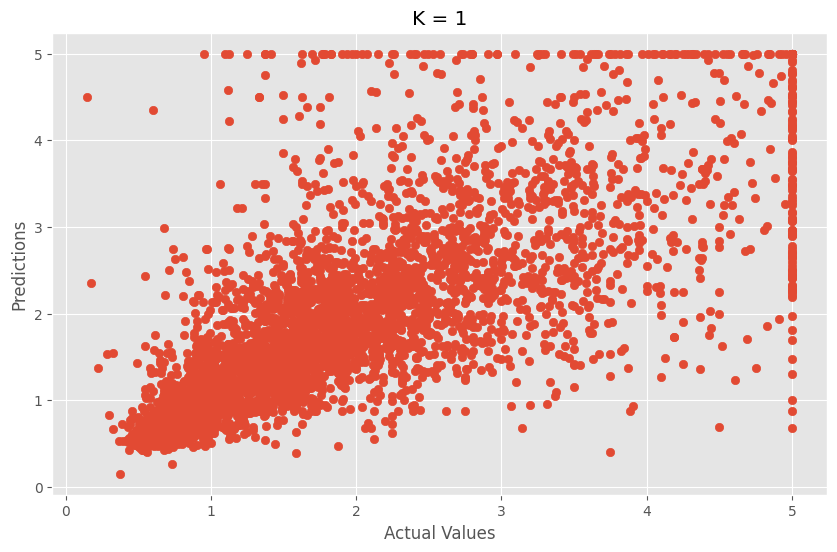

K = 16512: RMSE = 1.1448563543099792


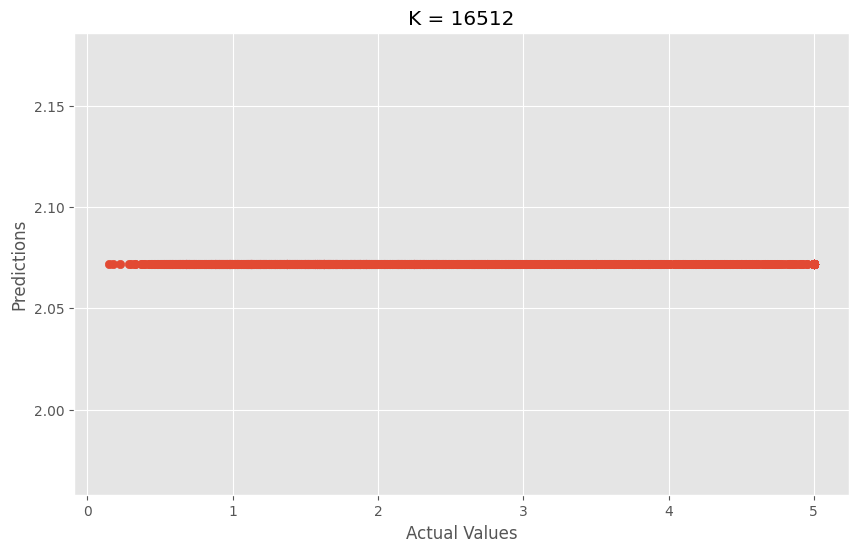

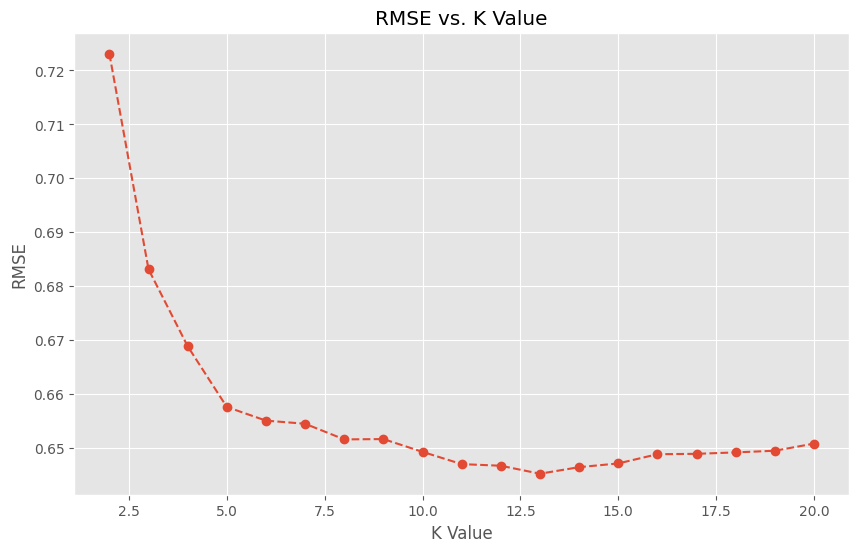

Optimal K value (excluding edge cases): 13


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MEDV'] = housing.target

# Separate features (X) and target variable (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Explore K=1 and K=size of training set
k_values = [1, len(X_train)]  # K values to explore

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred, squared=False)

    # Print the results
    print(f"K = {k}: RMSE = {error}")

    # Plot the predictions against actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title(f'K = {k}')
    plt.show()


# Find optimal K (excluding edge cases)
rmse_val = []
for k in range(2, 21):  # Exclude K=1 and K=len(X_train)
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(y_test, pred, squared=False)
    rmse_val.append(error)

# Plot RMSE values against K values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), rmse_val, marker='o', linestyle='dashed')
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.title('RMSE vs. K Value')
plt.show()

# Find the optimal K with the lowest RMSE (excluding edge cases)
optimal_k = range(2, 21)[rmse_val.index(min(rmse_val))]
print(f"Optimal K value (excluding edge cases): {optimal_k}")